### [문항 1]
1. 빅마트체인은 여러도시에 10개의 매장을 가지고 있고 1559개의 상품을 취급하고 있습니다.
매장의 세일데이터를 이용하여 세일을 예측하는 여러 회귀모델로 결정계수(R Square),
평가지표(MSE, RMSE, MAE)를 엑셀로 만들어서 소스파일과 함께 제출하시오.
또한 train, validation, test 테이터를 생성(데이터 분할은 8:2)하여
각 데이터별(train, validation, test) R Square 점수를 시각화 한후에 평가 결과(쥬피터 노트북)를 작성하세요
(데이터 분할은 Random_State=42 적용)

In [1]:
# train data를 3개 train, val, test로 나누고 예측을 함
# 여러 모델을 가지고 R2, MSE 구함
# test data를 통해 예측을 해봄
# test data를 여러 모델을 적용해서 예측

In [2]:
# 사용 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
# bigmart_train 데이터 불러오기
train_bm = pd.read_csv('C:/Users/USER/Desktop/스마트 국방/Pandas/머신러닝/실습문제/bigmart_train.csv', encoding='utf-8')
train_bm

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
# bigmart_test 데이터 불러오기
test_bm = pd.read_csv('C:/Users/USER/Desktop/스마트 국방/Pandas/머신러닝/실습문제/bigmart_test.csv', encoding='utf-8')
test_bm

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


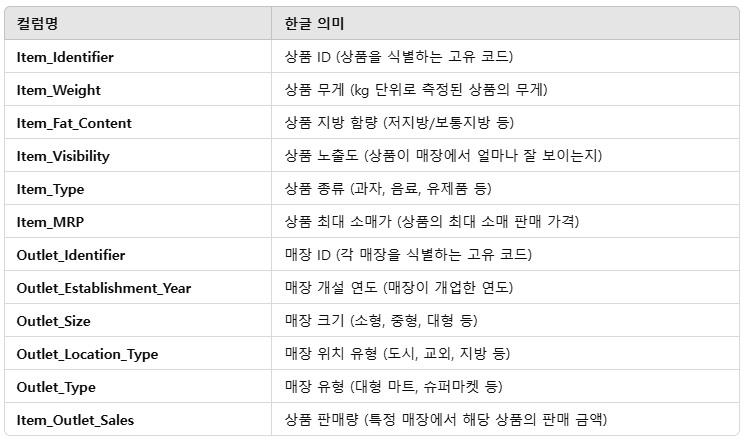

### 결측치 처리

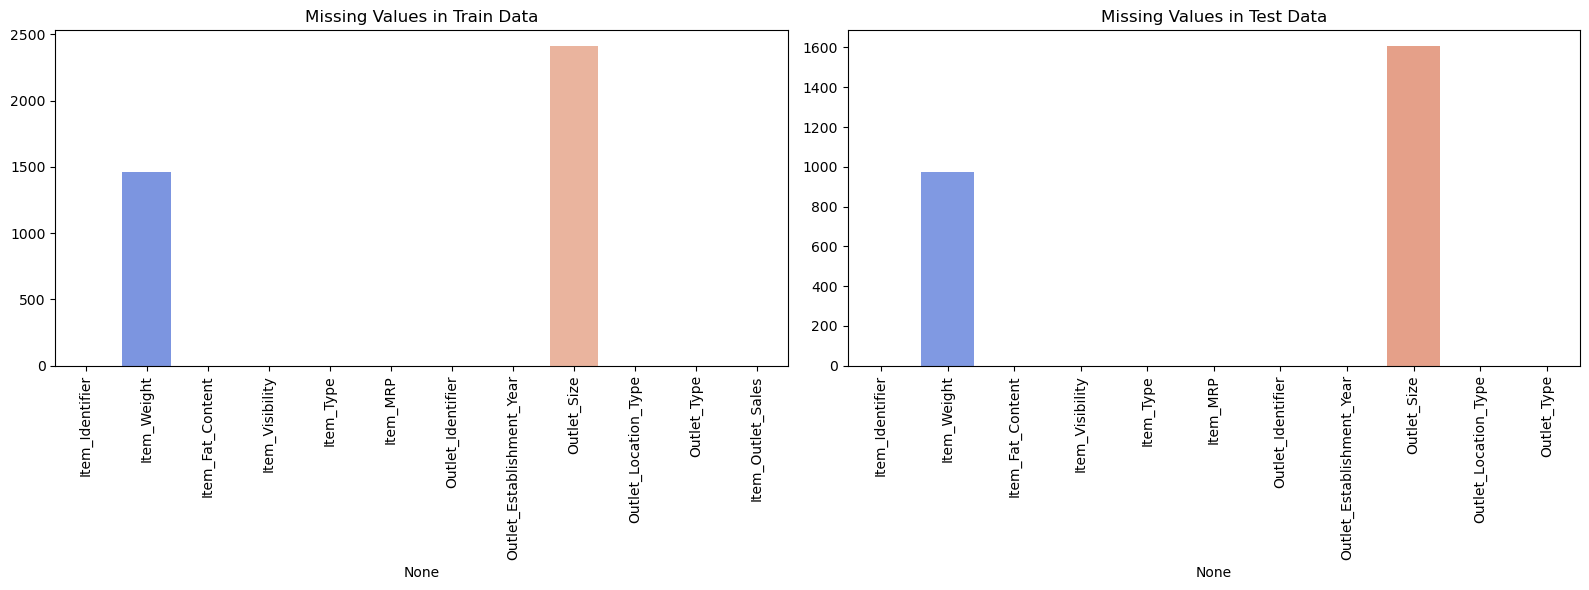

Train Data Null:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Test Data NUll:
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [5]:
# null값 확인

# 훈련 데이터의 결측값 확인
missing_value = train_bm.isnull().sum()

# 테스트 데이터의 결측값 확인
missing_value2 = test_bm.isnull().sum()

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 서브플롯 (훈련 데이터)
sns.barplot(x=missing_value.index, y=missing_value.values, palette='coolwarm', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Missing Values in Train Data')

# 두 번째 서브플롯 (테스트 데이터)
sns.barplot(x=missing_value2.index, y=missing_value2.values, palette='coolwarm', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Missing Values in Test Data')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 결측값 출력
print("Train Data Null:\n", train_bm.isnull().sum())
print("\nTest Data NUll:\n", test_bm.isnull().sum())

In [6]:
# 데이터타입 확인
print('Train_bm', train_bm.info())
print()
print('Test_bm', test_bm.info())
# null값이 존재하는 Item_Weight - 실수형 / Outlet_size - 문자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
Train_bm None

<class 'pandas.core.frame.Data

#### Item_Weight 결측치 처리

Train_Item_Weight 기술 통계량
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

 Test_Item_Weight 기술 통계량
count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64


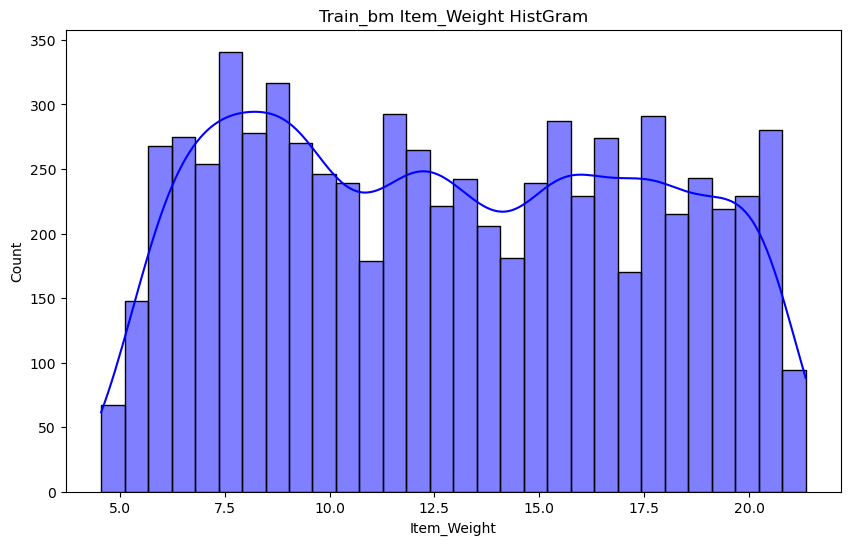

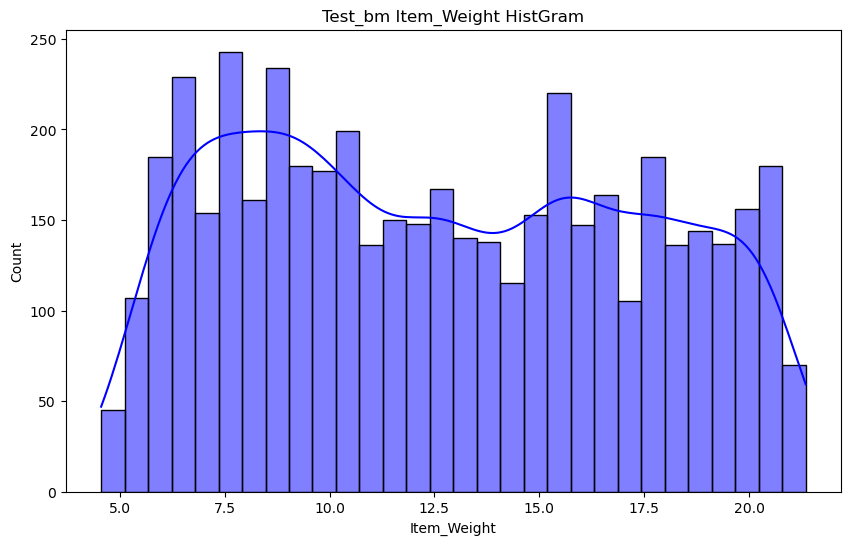

In [7]:
# Item_Weight 히스토그램 및 기술통계량 확인

# Train_bm
plt.figure(figsize=(10, 6))
sns.histplot(train_bm['Item_Weight'], bins=30, kde=True, color='blue')
plt.title('Train_bm Item_Weight HistGram')
print('Train_Item_Weight 기술 통계량')
print(train_bm['Item_Weight'].describe())

# Test_bm
plt.figure(figsize=(10, 6))
sns.histplot(test_bm['Item_Weight'], bins=30, kde=True, color='blue')
plt.title('Test_bm Item_Weight HistGram')
print('\n Test_Item_Weight 기술 통계량')
print(test_bm['Item_Weight'].describe())

In [8]:
# Item_Type별 Item_weight 평균 확인

# trian_bm
print('Train_bm Item_Weight 평균:', train_bm.groupby('Item_Type')['Item_Weight'].mean(), '\n')
print()
# test_bm
print('Test_bm Item_Weight 평균 :',test_bm.groupby('Item_Type')['Item_Weight'].mean())

Train_bm Item_Weight 평균: Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64 


Test_bm Item_Weight 평균 : Item_Type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household         

In [9]:
# 각 Item_Type의 평균으로 결측치 대체

# Train_bm
train_bm['Item_Weight'] = train_bm.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# 결측치 처리 결과 확인
print('Train_bm 결측치 처리 확인 :', train_bm['Item_Weight'].isnull().sum(), '\n')

# Test_bm
test_bm['Item_Weight'] = test_bm.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# 결측치 처리 결과 확인
print('Train_bm 결측치 처리 확인 :',test_bm['Item_Weight'].isnull().sum())

Train_bm 결측치 처리 확인 : 0 

Train_bm 결측치 처리 확인 : 0


Item_Weight 기술 통계량
count    8523.000000
mean       12.857890
std         4.232804
min         4.555000
25%         9.310000
50%        12.867061
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64
Test_bm Item_Weight 기술 통계량

 count    5681.000000
mean       12.694378
std         4.252967
min         4.555000
25%         9.195000
50%        12.684256
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64


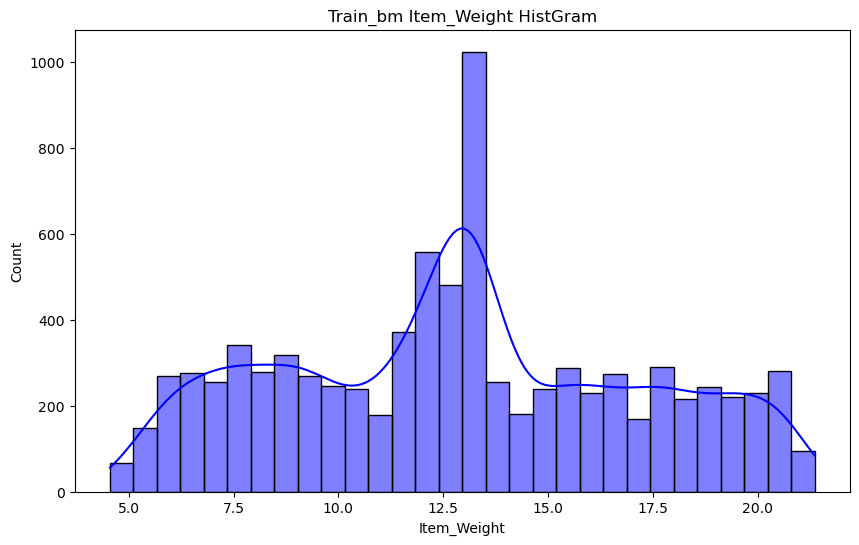

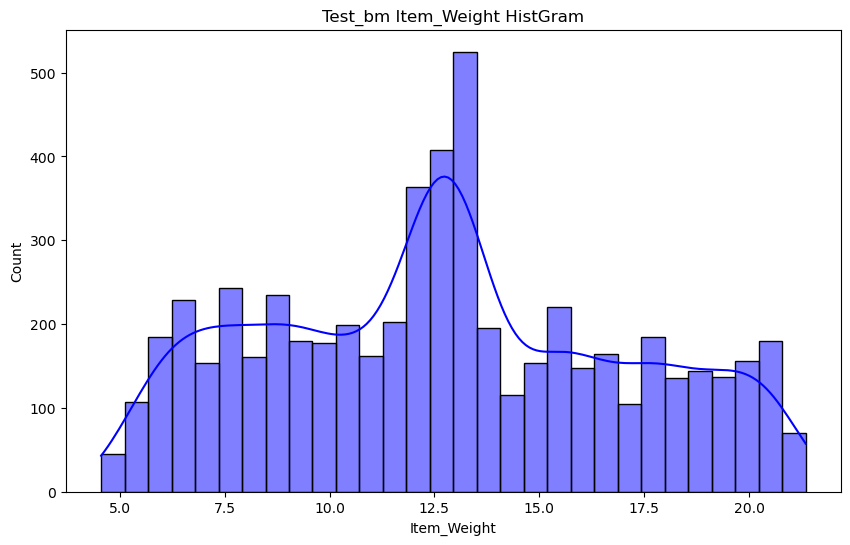

In [10]:
# 결측치 처리 후 Item_Weight 히스토그램 및 기술통계량 확인

# Train_bm
plt.figure(figsize=(10, 6))
sns.histplot(train_bm['Item_Weight'], bins=30, kde=True, color='blue')
plt.title('Train_bm Item_Weight HistGram')
print('Item_Weight 기술 통계량')
print(train_bm['Item_Weight'].describe())

# Test_bm
plt.figure(figsize=(10, 6))
sns.histplot(test_bm['Item_Weight'], bins=30, kde=True, color='blue')
plt.title('Test_bm Item_Weight HistGram')
print('Test_bm Item_Weight 기술 통계량')
print('\n', test_bm['Item_Weight'].describe())

#### Outlet_Size 결측치 처리

Train_bm Outlet_Size 기술 통계량
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64 

Test_bm Outlet_Size 기술 통계량


Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

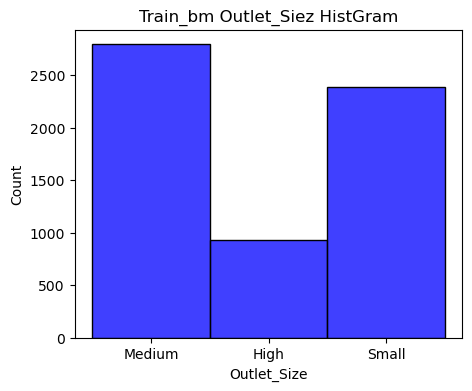

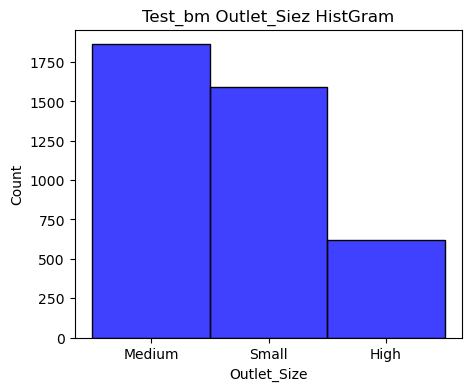

In [11]:
# Outlet_Size 히스토그램 및 항목별 개수 확인

# Trian_bm
plt.figure(figsize=(5, 4))
sns.histplot(x = train_bm['Outlet_Size'], color='blue')
plt.title('Train_bm Outlet_Siez HistGram')
print('Train_bm Outlet_Size 기술 통계량')
print(train_bm['Outlet_Size'].value_counts(), '\n')

# Test_bm
plt.figure(figsize=(5, 4))
sns.histplot(x = test_bm['Outlet_Size'], color='blue')
plt.title('Test_bm Outlet_Siez HistGram')
print('Test_bm Outlet_Size 기술 통계량')
test_bm['Outlet_Size'].value_counts()

In [12]:
# Outlet_Size의 결측치 처리하기 위한 연관정보 데이터 카운팅

train_bm.groupby(['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']).size()

Outlet_Size  Outlet_Type        Outlet_Location_Type
High         Supermarket Type1  Tier 3                  932
Medium       Supermarket Type1  Tier 1                  930
             Supermarket Type2  Tier 3                  928
             Supermarket Type3  Tier 3                  935
Small        Grocery Store      Tier 1                  528
             Supermarket Type1  Tier 1                  930
                                Tier 2                  930
dtype: int64

In [13]:
# 결측치가 존재하는 컬럼 찾기
train_bm[train_bm['Outlet_Size'].isnull()][['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,NaN,Tier 3,Grocery Store
8,NaN,Tier 2,Supermarket Type1
9,NaN,Tier 2,Supermarket Type1
25,NaN,Tier 2,Supermarket Type1
28,NaN,Tier 3,Grocery Store
...,...,...,...
8502,NaN,Tier 2,Supermarket Type1
8508,NaN,Tier 2,Supermarket Type1
8509,NaN,Tier 3,Grocery Store
8514,NaN,Tier 2,Supermarket Type1


In [14]:
# Tier2 - Supermarket Type1 결측치 존재
train_bm[(train_bm['Outlet_Type']=='Supermarket Type1') & (train_bm['Outlet_Location_Type']=='Tier 2')].isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Tier3 - Grocery Store 결측치 존재
train_bm[(train_bm['Outlet_Type']=='Grocery Store') & (train_bm['Outlet_Location_Type']=='Tier 3')].isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [16]:
# 결측치 총 개수 확인 1855 + 555 = 2410

In [17]:
# Tier2 - Supermarket Type1 / Tier3 - Grocery Store 모두 small에 해당
# 결측치 전부 Small로 처리

# Train_bm
train_bm['Outlet_Size'] = train_bm['Outlet_Size'].fillna('Small')

# 결측치 확인
print('Train_bm:',train_bm['Outlet_Size'].isnull().sum())

# Test_bm
test_bm['Outlet_Size'] = test_bm['Outlet_Size'].fillna('Small')

# 결측치 확인
print('Test_bm :',test_bm['Outlet_Size'].isnull().sum())

Train_bm: 0
Test_bm : 0


Text(0.5, 1.0, 'Test_bm Outlet_Size HistGram')

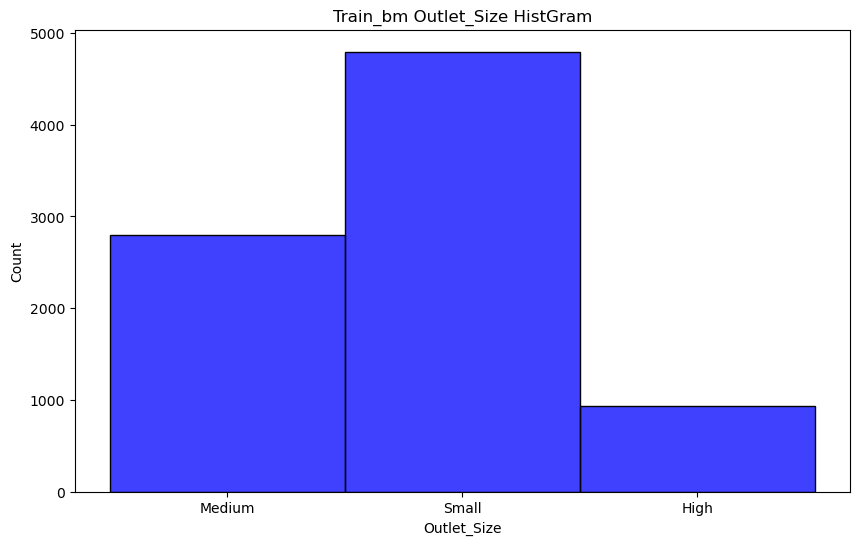

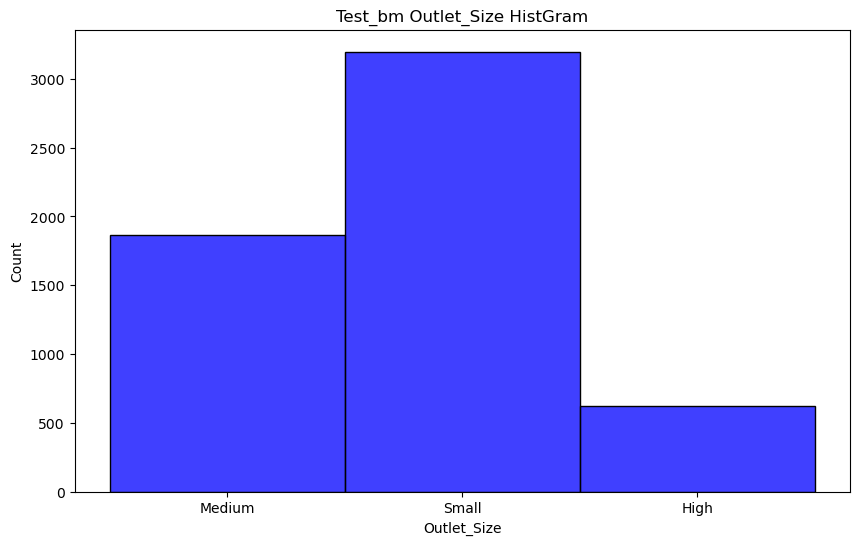

In [18]:
# 결측치 처리 후 Outlet_Size 히스토그램 및 기술통계량 확인

# Train_bm
plt.figure(figsize=(10, 6))
sns.histplot(x = train_bm['Outlet_Size'], color='blue')
plt.title('Train_bm Outlet_Size HistGram')


# Test_bm
plt.figure(figsize=(10, 6))
sns.histplot(x = test_bm['Outlet_Size'], color='blue')
plt.title('Test_bm Outlet_Size HistGram')


In [19]:
# 최종 결측치 처리 확인

# Train_bm
print('Train_bm \n', train_bm.isnull().sum(), '\n')

# Test_bm
print('Test_bm \n', test_bm.isnull().sum())

Train_bm 
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 

Test_bm 
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


### 이상치 탐색

In [20]:
# 변수의 데이터 타입 확인
train_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


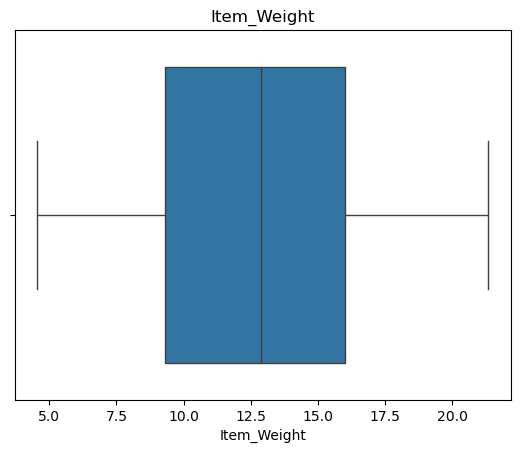

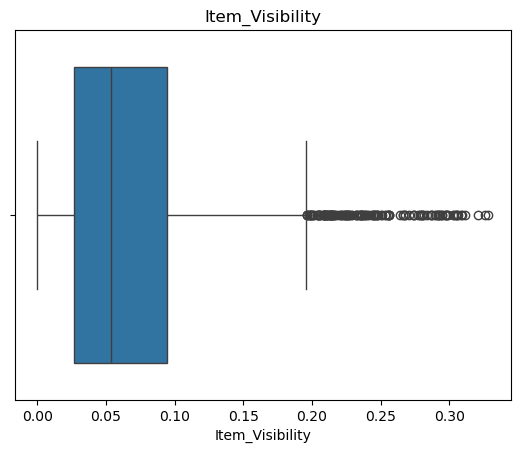

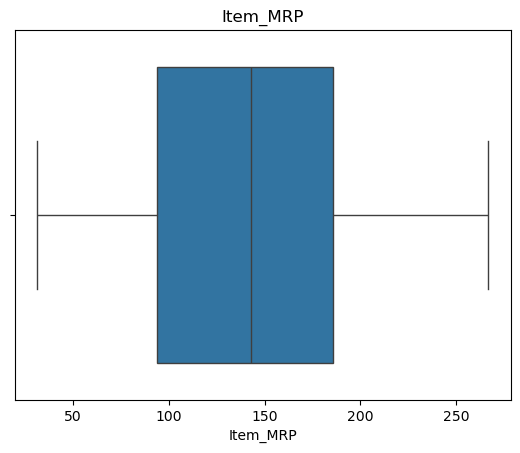

In [21]:
# 수치형 변수들을 Box-Plot 그리기
numeric_columns = train_bm[['Item_Weight', 'Item_Visibility', 'Item_MRP']]

for column in numeric_columns :
    sns.boxplot(x=train_bm[column])
    plt.title(column)
    plt.show()

#### Item_Visbility (상품 노출도)
* 상품 노출도가 0 인것들은 상품진열이 안되어 있다고 가정
* 0인 값들에 대한 전처리 필요
* Item_Type과 연관지어 처리

In [22]:
# Item_Type별 Item_Visibility의 0을 제외한 평균값 구하기

# Train_bm
print('Train_bm \n',train_bm[train_bm['Item_Visibility'] != 0].groupby('Item_Type')['Item_Visibility'].mean(),'\n')

# Test_bm
print('Test_bm \n',test_bm[test_bm['Item_Visibility'] != 0].groupby('Item_Type')['Item_Visibility'].mean())

Train_bm 
 Item_Type
Baking Goods             0.074331
Breads                   0.071069
Breakfast                0.088126
Canned                   0.071779
Dairy                    0.076701
Frozen Foods             0.069804
Fruits and Vegetables    0.073719
Hard Drinks              0.070547
Health and Hygiene       0.058958
Household                0.064963
Meat                     0.065360
Others                   0.064030
Seafood                  0.079974
Snack Foods              0.070866
Soft Drinks              0.069264
Starchy Foods            0.075184
Name: Item_Visibility, dtype: float64 

Test_bm 
 Item_Type
Baking Goods             0.071750
Breads                   0.077384
Breakfast                0.084410
Canned                   0.071860
Dairy                    0.074273
Frozen Foods             0.074844
Fruits and Vegetables    0.072662
Hard Drinks              0.070142
Health and Hygiene       0.062480
Household                0.060658
Meat                     0.061416
O

In [23]:
# Item_Type별 평균값으로 Item_Visbility의 값이 0인 것들을 대체

# Train_bm
train_bm['Item_Visibility'] = train_bm.groupby('Item_Type')['Item_Visibility'].transform(lambda x: x.replace(0, x[x != 0].mean()))
print(train_bm[train_bm['Item_Visibility']==0])

# Test_bm
test_bm['Item_Visibility'] = test_bm.groupby('Item_Type')['Item_Visibility'].transform(lambda x: x.replace(0, x[x != 0].mean()))
print(test_bm[train_bm['Item_Visibility']==0])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


### 범주형 변수 전처리

In [24]:
# Imte_Fat_Content 컬럼 같은 의미의 데이터 하나로 통합

In [25]:
train_bm['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
# Low Fat, Regular로 데이터 통합

# Trian_bm
train_bm['Item_Fat_Content'] = train_bm['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
train_bm['Item_Fat_Content'] = train_bm['Item_Fat_Content'].replace('reg', 'Regular')
print('Train_bm :',train_bm['Item_Fat_Content'].unique())

# Test_bm
test_bm['Item_Fat_Content'] = test_bm['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test_bm['Item_Fat_Content'] = test_bm['Item_Fat_Content'].replace('reg', 'Regular')
print('Test_bm:',test_bm['Item_Fat_Content'].unique())

Train_bm : ['Low Fat' 'Regular']
Test_bm: ['Low Fat' 'Regular']


In [27]:
# Item_Type 컬럼 -> Catrgory화
print('Train_bm',train_bm['Item_Type'].unique())
print('Test_bm', test_bm['Item_Type'].unique())

Train_bm ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Test_bm ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [28]:
# Category별로 변수들 바인딩
category_a = {'Beverage' : ['Soft Drinks', 'Hard Drinks', 'Health and Hygiene'],
            'Household' : ['Household', 'Health and Hygiene'],
            'Food' : ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 
             'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads', 
             'Starchy Foods', 'Seafood', 'Others'] }

In [29]:
# Item_Type을 Category로 변환하는 함수 만들기
def categorize_item(item):
    for category, items in category_a.items():
        if item in items:
            return category
    return 'Unknown' 

# Train_bm
train_bm['Category'] = train_bm['Item_Type'].apply(categorize_item)
print('Train_bm \n', train_bm[['Item_Type','Category']].head(), '\n')

# Test_bm
test_bm['Category'] = test_bm['Item_Type'].apply(categorize_item)
print('Test_bm \n',test_bm[['Item_Type','Category']].head())

Train_bm 
                Item_Type   Category
0                  Dairy       Food
1            Soft Drinks   Beverage
2                   Meat       Food
3  Fruits and Vegetables       Food
4              Household  Household 

Test_bm 
      Item_Type Category
0  Snack Foods     Food
1        Dairy     Food
2       Others     Food
3  Snack Foods     Food
4        Dairy     Food


### 범주형 변수의 종속변수와의 관계 비교

In [30]:
# 범주형 독립변수와 수치형 종속변수의 유의성을 비교하기 위해 ANOVA분석 사용
from scipy import stats

In [31]:
# Item_Fat_Content ANOVA 분석

# 각 범주에 해당하는 데이터 리스트로 준비
low_fat = train_bm[train_bm['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales']
regular = train_bm[train_bm['Item_Fat_Content']=='Regular']['Item_Outlet_Sales']

# ANOVA 분석 수행
f_stat, p_value = stats.f_oneway(low_fat, regular)

# 결과 출력
print("F-statistic:", f_stat)
print("P-value:", p_value)

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
    print('독립변수 선정')
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 2.98666429015733
P-value: 0.08398916967694944
유의미한 차이가 없습니다.


In [32]:
# Outlet_Size ANOVA 분석

# 각 범주에 해당하는 데이터 리스트로 준비
small = train_bm[train_bm['Outlet_Size']=='Small']['Item_Outlet_Sales']
medium = train_bm[train_bm['Outlet_Size']=='Medium']['Item_Outlet_Sales']
high = train_bm[train_bm['Outlet_Size']=='High']['Item_Outlet_Sales']

# ANOVA 분석 수행
f_stat, p_value = stats.f_oneway(small, medium, high)

# 결과 출력
print("F-statistic:", f_stat)
print("P-value:", p_value)

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
    print('독립변수 선정')
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 213.69096479853798
P-value: 2.8042418281729364e-91
유의미한 차이가 있습니다.
독립변수 선정


In [33]:
# Outlet_location_Type ANOVA 분석

# 각 범주에 해당하는 데이터 리스트로 준비
tier1 = train_bm[train_bm['Outlet_Location_Type']=='Tier 1']['Item_Outlet_Sales']
tier2 = train_bm[train_bm['Outlet_Location_Type']=='Tier 2']['Item_Outlet_Sales']
tier3 = train_bm[train_bm['Outlet_Location_Type']=='Tier 3']['Item_Outlet_Sales']

# ANOVA 분석 수행
f_stat, p_value = stats.f_oneway(tier1, tier2, tier3)

# 결과 출력
print("F-statistic:", f_stat)
print("P-value:", p_value)

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
    print('독립변수 선정')
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 53.947739874560675
P-value: 5.2228172988842975e-24
유의미한 차이가 있습니다.
독립변수 선정


In [34]:
# Outlet_Type ANOVA 분석

# 각 범주에 해당하는 데이터 리스트로 준비
gs = train_bm[train_bm['Outlet_Type']=='Grocery Store']['Item_Outlet_Sales']
sp1 = train_bm[train_bm['Outlet_Type']=='Supermarket Type1']['Item_Outlet_Sales']
sp2 = train_bm[train_bm['Outlet_Type']=='Supermarket Type2']['Item_Outlet_Sales']
sp3 = train_bm[train_bm['Outlet_Type']=='Supermarket Type3']['Item_Outlet_Sales']


# ANOVA 분석 수행
f_stat, p_value = stats.f_oneway(gs, sp1, sp2, sp3)

# 결과 출력
print("F-statistic:", f_stat)
print("P-value:", p_value)

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
    print('독립변수 선정')
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 894.6500119018012
P-value: 0.0
유의미한 차이가 있습니다.
독립변수 선정


In [35]:
# Category ANOVA 분석

# 각 범주에 해당하는 데이터 리스트로 준비
food = train_bm[train_bm['Category']=='Food']['Item_Outlet_Sales']
bev = train_bm[train_bm['Category']=='Beverage']['Item_Outlet_Sales']
hh = train_bm[train_bm['Category']=='Household']['Item_Outlet_Sales']

# ANOVA 분석 수행
f_stat, p_value = stats.f_oneway(food, bev, hh)

# 결과 출력
print("F-statistic:", f_stat)
print("P-value:", p_value)

# P-value 해석
if p_value < 0.05:
    print("유의미한 차이가 있습니다.")
    print('독립변수 선정')
else:
    print("유의미한 차이가 없습니다.")

F-statistic: 5.743945108866122
P-value: 0.003214523385182687
유의미한 차이가 있습니다.
독립변수 선정


#### 범주형 변수 인코딩
* item_fat_content  - Label Encoding
* outlet_size - Label Encoding
* outlet_location_type - Label Encoding
* outlet_type - One-Hot-Encoding
* category - One-Hot-Encoding

In [36]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
train_bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Beverage
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.064963,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Household


In [38]:
# Item_Fat_Content - LabelEncoding (Low Fat : 0 / Regular : 1)

# Train_bm
train_bm['Item_Fat_Content'] = label_encoder.fit_transform(train_bm['Item_Fat_Content'])
print('Train_bm :',train_bm['Item_Fat_Content'].unique(),'\n')

# Test_bm
test_bm['Item_Fat_Content'] = label_encoder.fit_transform(test_bm['Item_Fat_Content'])
print('Test_bm :',test_bm['Item_Fat_Content'].unique())

Train_bm : [0 1] 

Test_bm : [0 1]


In [39]:
# Outlet_Size - LabelEncoding ( Small : 2 / Medium : 1 / High : 0 )

# Train_bm
train_bm['Outlet_Size'] = label_encoder.fit_transform(train_bm['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2}))
print('Train_bm :',train_bm['Outlet_Size'].unique())

# Test_bm
test_bm['Outlet_Size'] = label_encoder.fit_transform(test_bm['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2}))
print('Test_bm :', test_bm['Outlet_Size'].unique())

Train_bm : [1 0 2]
Test_bm : [1 0 2]


In [40]:
# Outlet_Location_Type - LabelEncoding ( Tier 1 : 0 / Tier 2 : 1 / Tier 3 : 2)

# Train_bm
train_bm['Outlet_Location_Type'] = label_encoder.fit_transform(train_bm['Outlet_Location_Type'])
print('Train_bm :', train_bm['Outlet_Location_Type'].unique())

# Test_bm
test_bm['Outlet_Location_Type'] = label_encoder.fit_transform(test_bm['Outlet_Location_Type'])
print('Test_bm :', test_bm['Outlet_Location_Type'].unique())



Train_bm : [0 2 1]
Test_bm : [0 1 2]


In [41]:
# Outlet_Type, Category - OneHotEncoding

# Train_bm
dummy1 = pd.get_dummies(train_bm['Outlet_Type'])
dummy2 = pd.get_dummies(train_bm['Category'])

train_bm = pd.concat([train_bm, dummy1, dummy2], axis=1)

columns = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Beverage', 'Food', 'Household']
train_bm[columns] = train_bm[columns].astype(int)

print('Train_bm :', train_bm.columns, '\n')
train_bm.head()

# Test_bm
dummy3 = pd.get_dummies(test_bm['Outlet_Type'])
dummy4 = pd.get_dummies(test_bm['Category'])

test_bm = pd.concat([test_bm, dummy3, dummy4], axis=1)

columns = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Beverage', 'Food', 'Household']
test_bm[columns] = test_bm[columns].astype(int)
print('Test_bm :', test_bm.columns)

Train_bm : Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Category', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Beverage', 'Food', 'Household'],
      dtype='object') 

Test_bm : Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Category', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'Beverage', 'Food',
       'Household'],
      dtype='object')


In [42]:
# 불필요한 컬럼 삭제

# Train_bm
train_bm = train_bm.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Category'], axis=1)

print('Train_bm: ', train_bm.columns, '\n')

# Test_bm
test_bm = test_bm.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Category'], axis=1)
print('Test_bm :', test_bm.columns)

Train_bm:  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Beverage', 'Food', 'Household'],
      dtype='object') 

Test_bm : Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'Beverage', 'Food',
       'Household'],
      dtype='object')


#### 상관관계 분석

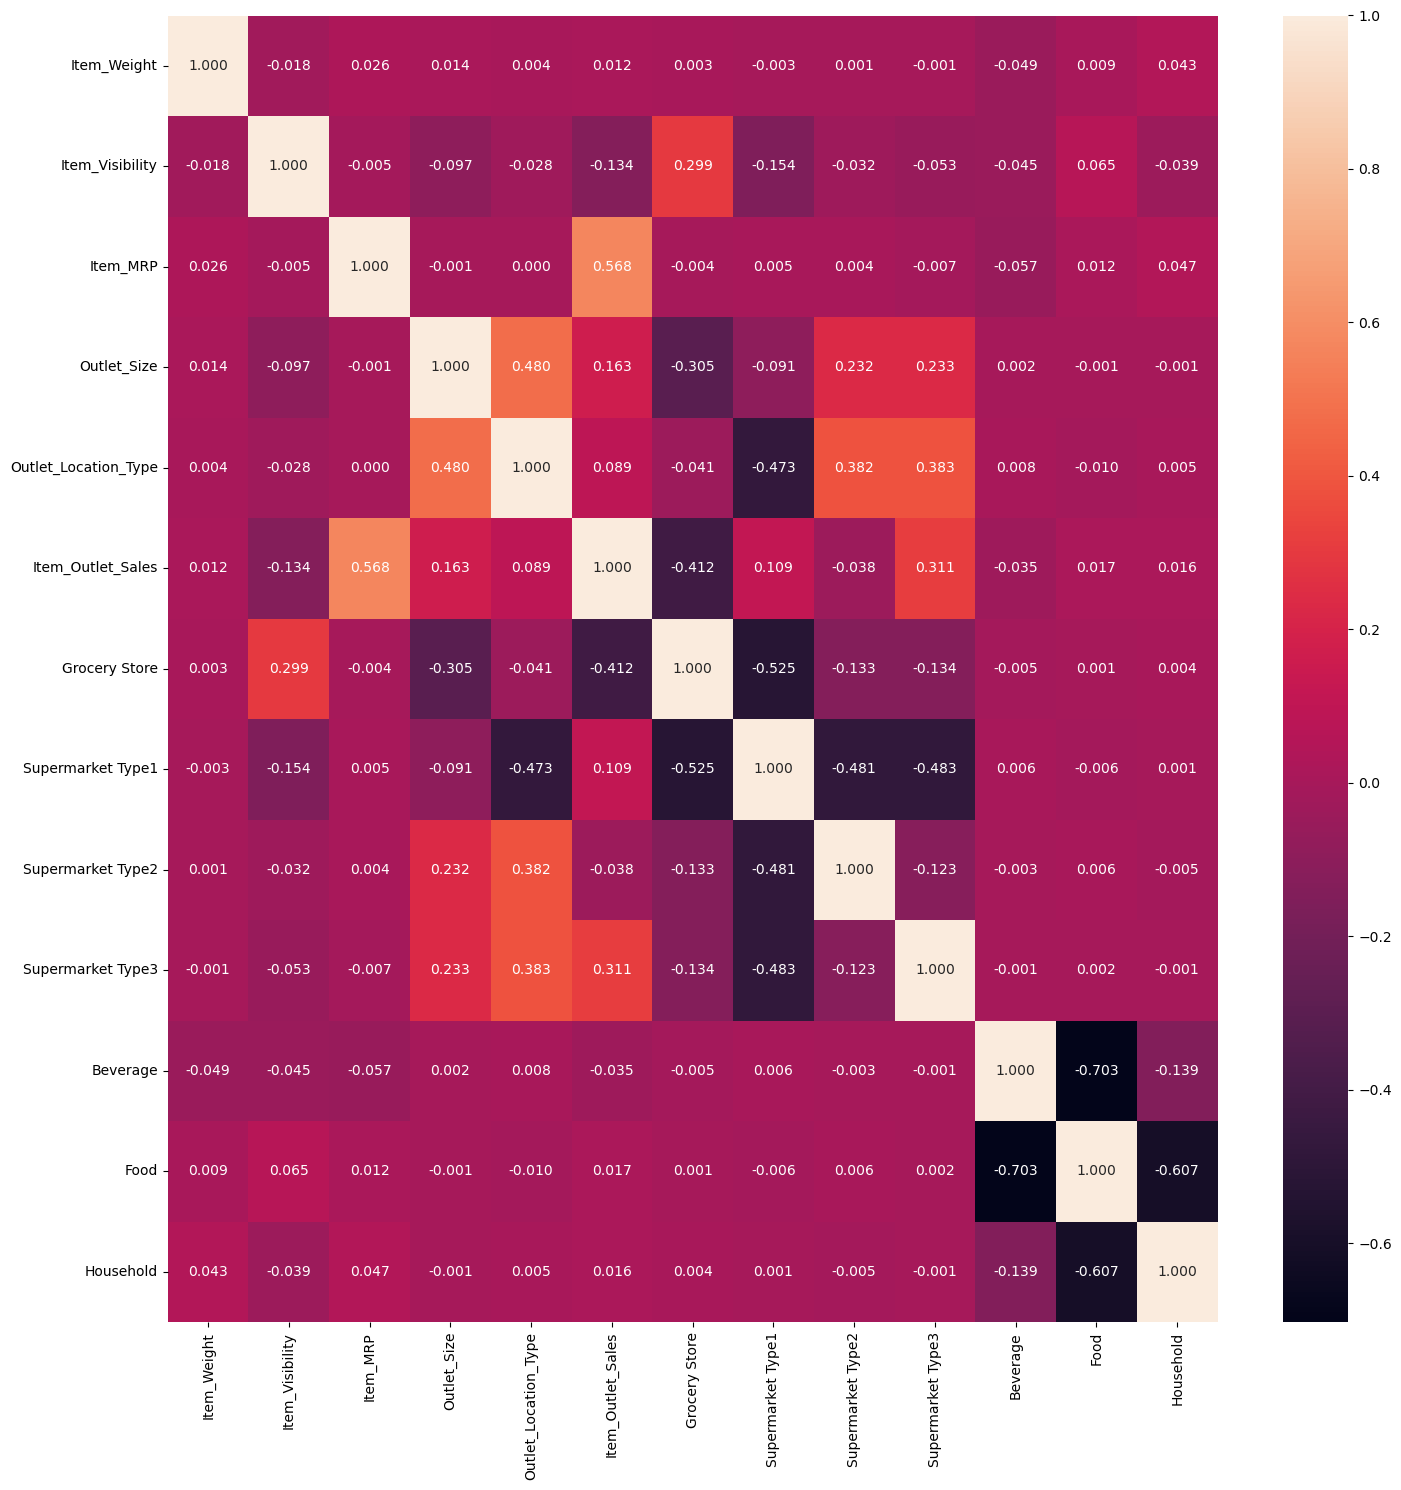

In [43]:
# 히트맵 그리기

corr = train_bm.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.3f')
plt.tight_layout()
plt.show()

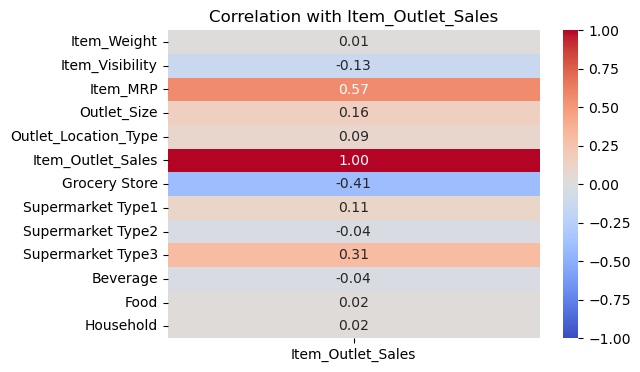

In [44]:
# 종속변수와의 상관관계만 추출

# 종속 변수 'Item_Outlet_Sales'와의 관계만 추출
corr_target = corr[['Item_Outlet_Sales']]

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# 그래프 출력
plt.title('Correlation with Item_Outlet_Sales')
plt.show()

#### 다중공선성 확인

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# target을 제외한 데이터 선택
train_vif = train_bm.loc[:, train_bm.columns != 'Item_Outlet_Sales']

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]

# VIF 출력
print(vif_data)

                 Feature       VIF
0            Item_Weight  1.004949
1        Item_Visibility  1.104259
2               Item_MRP  1.005358
3            Outlet_Size  1.455812
4   Outlet_Location_Type  1.805700
5          Grocery Store       inf
6      Supermarket Type1       inf
7      Supermarket Type2       inf
8      Supermarket Type3       inf
9               Beverage       inf
10                  Food       inf
11             Household       inf


#### 훈련, 검증 데이터 분리

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# X, y 설정
X = train_bm.drop('Item_Outlet_Sales', axis=1)
y = train_bm['Item_Outlet_Sales']
X_test = test_bm.iloc[:,:12]

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (스케일링 필요 모델만 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 표준화
X_valid_scaled = scaler.fit_transform(X_valid)  # 검증 데이터 표준화
X_test_scaled = scaler.fit_transform(X_test) # 테스트 데이터 표준화

### 회귀 모델링

In [47]:
# 결정계수 (R²), MSE, RMSE, MAE를 계산하는 함수
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)  # 결정계수 (R²)
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차 (MSE)
    rmse = np.sqrt(mse)  # 평균 제곱근 오차 (RMSE)
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차 (MAE)
    return r2, mse, rmse, mae


#### 선형회귀 (Linear Regression)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 예측
y_train_pred = lr.predict(X_train_scaled)
y_valid_pred = lr.predict(X_valid_scaled)
y_test_pred = lr.predict(X_test_scaled)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
lr_df = pd.DataFrame({
    'Model' : ['Linear', 'Linear'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(lr_df)

# 테스트 파일에 예측값 삽입
test_bm['Linear Regression predict'] = y_test_pred
test_bm.head()

    Model        Type        R²           MSE         RMSE         MAE
0  Linear       Train  0.557754  1.308184e+06  1143.758927  848.521425
1  Linear  Validation  0.574957  1.155253e+06  1074.827172  804.316974


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100


#### 릿지 회귀 (Lidge Regression)

In [68]:
from sklearn.linear_model import Ridge

# 모델 학습
rd = Ridge(alpha=1.0)
rd.fit(X_train_scaled, y_train)

# 예측
y_train_pred = rd.predict(X_train_scaled)
y_valid_pred = rd.predict(X_valid_scaled)
y_test_pred = rd.predict(X_test_scaled)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
rd_df = pd.DataFrame({
    'Model' : ['Ridge', 'Ridge'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(rd_df)

# 테스트 파일에 예측값 삽입
test_bm['Ridge Regression predict'] = y_test_pred
test_bm.head()

   Model        Type        R²           MSE         RMSE         MAE
0  Ridge       Train  0.557754  1.308185e+06  1143.758942  848.515061
1  Ridge  Validation  0.574961  1.155242e+06  1074.821986  804.313346


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict,XGBoost predict,LightGBM predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321,1580.880371,1677.838920
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409,1389.640015,1360.412749
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864,622.546326,624.740162
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992,2417.037354,2370.603745
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425,6228.132812,6243.077211


#### 라쏘 회귀 (Lasso Regression)

In [50]:
from sklearn.linear_model import Lasso

# 모델 학습
ls = Lasso(alpha=0.1)
ls.fit(X_train_scaled, y_train)

# 예측
y_train_pred = ls.predict(X_train_scaled)
y_valid_pred = ls.predict(X_valid_scaled)
y_test_pred = ls.predict(X_test_scaled)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
ls_df = pd.DataFrame({
    'Model' : ['Lasso', 'Lasso'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(ls_df)

# 테스트 파일에 예측값 삽입
test_bm['Lasso Regression predict'] = y_test_pred
test_bm.head()

   Model        Type        R²           MSE         RMSE         MAE
0  Lasso       Train  0.557754  1.308185e+06  1143.758975  848.514262
1  Lasso  Validation  0.574992  1.155160e+06  1074.783841  804.175039


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963


#### 랜덤포레스트 (회귀모형)

하이퍼파라미터 튜닝 전

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_train_pred = rf.predict(X_train)
y_valid_pred = rf.predict(X_valid)
y_test_pred = rf.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
rf_df = pd.DataFrame({
    'RandomForest': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(rf_df)

# 테스트 파일에 예측값 삽입
test_bm['Random Forest predict'] = y_test_pred
test_bm.head()

  RandomForest        R²           MSE         RMSE         MAE
0        Train  0.935246  1.915449e+05   437.658432  302.240504
1   Validation  0.555543  1.208021e+06  1099.100088  771.192993


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1780.841892
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1315.254610
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,571.669196
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2318.055938
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6917.235888


하이퍼파라미터 튜닝 후

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 데이터 준비 (X_train, y_train)

# RandomForestRegressor 모델 정의
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],    # 리프 노드에 있는 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 각 트리를 분할할 때 고려할 최대 피처 수
    'bootstrap': [True, False]  # 부트스트랩 샘플링 사용 여부
}

# 그리드 서치 실행
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 학습 데이터로 최적의 모델 찾기
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)

# 최적의 모델로 예측
best_rf = grid_search.best_estimator_

# 예측
y_train_pred = best_rf.predict(X_train)
y_valid_pred = best_rf.predict(X_valid)
y_test_pred = best_rf.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
rf_df = pd.DataFrame({
    'Model' : ['RandomForest', 'RandomForest'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(rf_df)

# 테스트 파일에 예측값 삽입
test_bm['Random Forest predict'] = y_test_pred
test_bm.head()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
          Model        Type        R²           MSE         RMSE         MAE
0  RandomForest       Train  0.657574  1.012914e+06  1006.436334  708.674464
1  RandomForest  Validation  0.616517  1.042296e+06  1020.928944  725.226045


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599


#### Gradient Boosting

하이퍼파라미터 튜닝 전

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gdb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gdb.fit(X_train, y_train)

# 예측
y_train_pred = gdb.predict(X_train)
y_valid_pred = gdb.predict(X_valid)
y_test_pred = gdb.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
gdb_df = pd.DataFrame({
    'Model' : ['GradientBoosting', 'GradientBoosting'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(gdb_df)

# 테스트 파일에 예측값 삽입
test_bm['GradientBoosting predict'] = y_test_pred
test_bm.head()

              Model        Type        R²           MSE         RMSE  \
0  GradientBoosting       Train  0.632413  1.087340e+06  1042.756183   
1  GradientBoosting  Validation  0.602888  1.079339e+06  1038.912399   

          MAE  
0  735.778721  
1  724.377809  


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1544.850389
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1373.518715
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,653.343745
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2510.318394
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,6456.452302


하이퍼파라미터 튜닝 후

In [55]:
gdb = GradientBoostingRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [50, 100, 200],       # 트리 개수
#     'learning_rate': [0.001, 0.01, 0.1],  # 학습률
#     'max_depth': [3, 5, 7],               # 트리의 최대 깊이
#     'min_samples_split': [2, 5, 10],       # 분할을 위한 최소 샘플 수
#     'min_samples_leaf': [1, 2, 4],         # 리프 노드에 있어야 할 최소 샘플 수
#     'subsample': [0.8, 0.9, 1.0],         # 샘플링 비율
#     'max_features': ['auto', 'sqrt', 'log2']  # 분할을 위한 최대 피처 수
# }

param_grid = {
    'n_estimators': [100, 150],        # 트리 개수 (50과 200을 제외하고 중간 범위로 선택)
    'learning_rate': [0.01, 0.05],     # 학습률 (0.001과 0.1을 제외하고 적당한 값으로 선택)
    'max_depth': [3, 5],                # 트리의 최대 깊이 (과적합을 방지하기 위해 작은 값 선택)
    'min_samples_split': [2, 5],        # 분할을 위한 최소 샘플 수 (2 또는 5)
    'min_samples_leaf': [1, 2],         # 리프 노드에 있어야 할 최소 샘플 수 (1 또는 2)
    'subsample': [0.8, 1.0],            # 샘플링 비율 (0.8과 1.0)
    'max_features': ['sqrt', 'log2']   # 특성 선택 (자동과 'sqrt', 'log2'로 좁힘)
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=gdb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)

# 최적 모델로 예측
best_gdb = grid_search.best_estimator_

# 예측
y_train_pred = best_gdb.predict(X_train)
y_valid_pred = best_gdb.predict(X_valid)
y_test_pred = best_gdb.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
gdb_df = pd.DataFrame({
    'Model' : ['GradientBoosting', 'GradientBoosting'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(gdb_df)

# 테스트 파일에 예측값 삽입
test_bm['GradientBoosting predict'] = y_test_pred
test_bm.head()

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 1.0}
              Model        Type        R²           MSE         RMSE  \
0  GradientBoosting       Train  0.613137  1.144360e+06  1069.747692   
1  GradientBoosting  Validation  0.611087  1.057055e+06  1028.131846   

          MAE  
0  759.288294  
1  731.336512  


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425


#### XGBoost

하이퍼파라미터 튜닝 전

In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# 예측
y_train_pred = xgb.predict(X_train)
y_valid_pred = xgb.predict(X_valid)
y_test_pred = xgb.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
xgb_df = pd.DataFrame({
    'Model' : ['XGBoost', 'XGBoost'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(xgb_df)

# 테스트 파일에 예측값 삽입
test_bm['XGBoost predict'] = y_test_pred
test_bm.head()

     Model        Type        R²           MSE         RMSE         MAE
0  XGBoost       Train  0.847641  4.506843e+05   671.330272  484.213767
1  XGBoost  Validation  0.537262  1.257709e+06  1121.476170  781.316195


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict,XGBoost predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321,1969.686646
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409,1190.646484
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864,691.149109
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992,1799.730103
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425,7068.010742


하이퍼파라미터 튜닝 후

In [65]:
xgb = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100],            # 트리의 개수
    'learning_rate': [0.01, 0.1],     # 학습률
    'max_depth': [3, 5],               # 트리의 최대 깊이
    'min_child_weight': [1, 2],        # 자식 노드의 최소 가중치
    'subsample': [0.8, 1.0],           # 샘플링 비율
    'colsample_bytree': [0.8, 1.0],    # 트리를 훈련할 때 사용할 피처 비율
    'gamma': [0, 0.1],                # 트리 분할 최소 손실 감소
    'reg_alpha': [0, 0.1],            # L1 정규화
    'reg_lambda': [0, 0.1]            # L2 정규화
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)

# 최적 모델로 예측
best_xgb = grid_search.best_estimator_

# 예측
y_train_pred = best_xgb.predict(X_train)
y_valid_pred = best_xgb.predict(X_valid)
y_test_pred = best_xgb.predict(X_test)

# 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)

# 결과 출력
xgb_df = pd.DataFrame({
    'Model' : ['XGBoost', 'XGBoost'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]
})

print(xgb_df)

# 테스트 파일에 예측값 삽입
test_bm['XGBoost predict'] = y_test_pred
test_bm.head()

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0}
     Model        Type        R²           MSE         RMSE         MAE
0  XGBoost       Train  0.624803  1.109851e+06  1053.494741  742.868484
1  XGBoost  Validation  0.606490  1.069549e+06  1034.190074  723.066178


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict,XGBoost predict,LightGBM predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321,1580.880371,1677.838920
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409,1389.640015,1360.412749
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864,622.546326,624.740162
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992,2417.037354,2370.603745
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425,6228.132812,6243.077211


#### LightGBM

하이퍼파라미터 튜닝 전

In [59]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=100, random_state=42)
lgb.fit(X_train, y_train)

# 예측
y_train_pred = lgb.predict(X_train)
y_valid_pred = lgb.predict(X_valid)
y_test_pred = lgb.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
lgb_df = pd.DataFrame({
    'Model' : ['LightGBM', 'LightGBM'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(lgb_df)

# 테스트 파일에 예측값 삽입
test_bm['LightGBM predict'] = y_test_pred
test_bm.head()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 12
[LightGBM] [Info] Start training from score 2202.365232
      Model        Type        R²           MSE         RMSE         MAE
0  LightGBM       Train  0.711332  8.538932e+05   924.063391  661.809747
1  LightGBM  Validation  0.592661  1.107135e+06  1052.204861  734.599846


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict,XGBoost predict,LightGBM predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321,1580.880371,1826.506269
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409,1389.640015,1353.525303
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864,622.546326,469.415007
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992,2417.037354,2149.859963
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425,6228.132812,6656.346430


하이퍼파라미터 튜닝 후

In [62]:
lgb = LGBMRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100],               # 트리의 개수 (고정)
    'learning_rate': [0.01, 0.1],        # 학습률
    'max_depth': [3, 5],                  # 트리의 최대 깊이
    'num_leaves': [31, 50],               # 리프 노드의 수
    'min_child_samples': [20, 50],        # 자식 노드의 최소 샘플 수
    'subsample': [0.8, 1.0],              # 샘플링 비율
    'colsample_bytree': [0.8, 1.0],       # 피처 샘플링 비율
    'reg_alpha': [0, 0.1],                # L1 정규화
    'reg_lambda': [0, 0.1]                # L2 정규화
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)

# 최적 모델로 예측
best_lgb = grid_search.best_estimator_

# 예측
y_train_pred = best_lgb.predict(X_train)
y_valid_pred = best_lgb.predict(X_valid)
y_test_pred = best_lgb.predict(X_test)

# 훈련, 검증 데이터의 성능 지표 계산
train_metrics = calculate_metrics(y_train, y_train_pred)
valid_metrics = calculate_metrics(y_valid, y_valid_pred)


# 결과를 데이터프레임에 저장
lgb_df = pd.DataFrame({
    'Model' : ['LightGBM', 'LightGBM'],
    'Type': ['Train', 'Validation'],
    'R²': [train_metrics[0], valid_metrics[0]], #test_metrics[0]],
    'MSE': [train_metrics[1], valid_metrics[1]], #test_metrics[1]],
    'RMSE': [train_metrics[2], valid_metrics[2]], #test_metrics[2]],
    'MAE': [train_metrics[3], valid_metrics[3]]#, test_metrics[3]]
})

# 결과 출력
print(lgb_df)

# 테스트 파일에 예측값 삽입
test_bm['LightGBM predict'] = y_test_pred
test_bm.head()

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 12
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Beverage,Food,Household,Linear Regression predict,Ridge Regression predict,Lasso Regression predict,Random Forest predict,GradientBoosting predict,XGBoost predict,LightGBM predict
0,20.75000,0.007565,107.8622,1,0,0,1,0,0,0,1,0,1833.151632,1833.261766,1832.932228,1728.759105,1667.994321,1580.880371,1677.838920
1,8.30000,0.038428,87.3198,0,1,0,1,0,0,0,1,0,1497.112285,1497.222951,1497.326966,1398.026756,1420.069409,1389.640015,1360.412749
2,14.60000,0.099575,241.7538,0,2,1,0,0,0,0,1,0,1964.102035,1964.117385,1965.944080,540.719175,803.655864,622.546326,624.740162
3,7.31500,0.015388,155.0340,0,1,0,1,0,0,0,1,0,2578.456268,2578.421050,2578.476279,2438.813515,2448.387992,2417.037354,2370.603745
4,12.95504,0.118599,234.2300,1,2,0,0,0,1,0,1,0,5201.515100,5201.048618,5199.571963,6227.755599,5798.859425,6228.132812,6243.077211


### 결과 해석

#### 모델별 결과 하나의 데이터 프레임으로 합치기

In [69]:
result = pd.concat([lr_df, rd_df, ls_df, rf_df, gdb_df, xgb_df, lgb_df])
result

,Model,Type,R²,MSE,RMSE,MAE
0,Linear,Train,0.557754,1.308184e+06,1143.758927,848.521425
1,Linear,Validation,0.574957,1.155253e+06,1074.827172,804.316974
0,Ridge,Train,0.557754,1.308185e+06,1143.758942,848.515061
1,Ridge,Validation,0.574961,1.155242e+06,1074.821986,804.313346
0,Lasso,Train,0.557754,1.308185e+06,1143.758975,848.514262
1,Lasso,Validation,0.574992,1.155160e+06,1074.783841,804.175039
0,RandomForest,Train,0.657574,1.012914e+06,1006.436334,708.674464
1,RandomForest,Validation,0.616517,1.042296e+06,1020.928944,725.226045
0,GradientBoosting,Train,0.613137,1.144360e+06,1069.747692,759.288294
1,GradientBoosting,Validation,0.611087,1.057055e+06,1028.131846,731.336512


In [71]:
# 검증데이터만 분리

result_val = result[result['Type']=='Validation']
result_val

,Model,Type,R²,MSE,RMSE,MAE
1,Linear,Validation,0.574957,1.155253e+06,1074.827172,804.316974
1,Ridge,Validation,0.574961,1.155242e+06,1074.821986,804.313346
1,Lasso,Validation,0.574992,1.155160e+06,1074.783841,804.175039
1,RandomForest,Validation,0.616517,1.042296e+06,1020.928944,725.226045
1,GradientBoosting,Validation,0.611087,1.057055e+06,1028.131846,731.336512
1,XGBoost,Validation,0.606490,1.069549e+06,1034.190074,723.066178
1,LightGBM,Validation,0.614913,1.046655e+06,1023.061759,719.652507


검증데이터 평가지표 엑셀 파일로 저장

In [73]:
result.to_excel('회귀모델_평가지표_도지훈.xlsx', index=False)

test 파일에 모델별 예측값 저장하기

In [92]:
test_bm.to_excel('회귀모델_모델별 test데이터 예측값_도지훈.xlsx', index=False)

#### 평가지표 그래프 그리기

모델별 R² 그래프

<Figure size 1000x600 with 0 Axes>

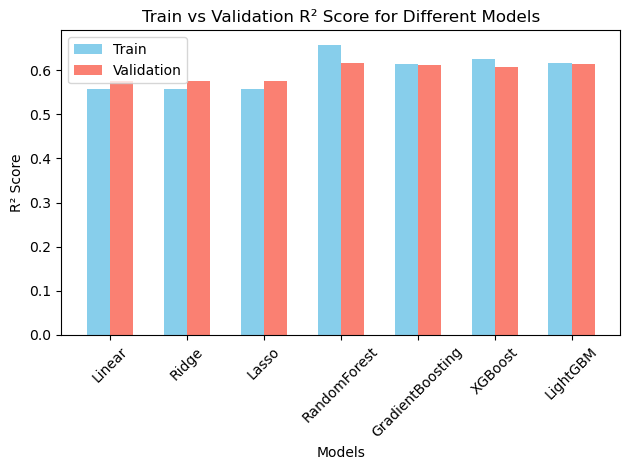

In [84]:
x = np.arange(len(result['Model'].unique()))  # 각 모델의 x 위치
width = 0.3  # 막대의 너비

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
fig, ax = plt.subplots()

# 훈련 데이터와 검증 데이터의 R² 값을 다른 색상으로 막대 그래프에 그리기
ax.bar(x - width/2, result[result['Type'] == 'Train']['R²'].values, width, label='Train', color='skyblue')
ax.bar(x + width/2, result[result['Type'] == 'Validation']['R²'].values, width, label='Validation', color='salmon')

# 그래프 제목과 라벨 추가
ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Train vs Validation R² Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(result['Model'].unique())
ax.legend()

plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

모델별 MSE 그래프

<Figure size 1000x600 with 0 Axes>

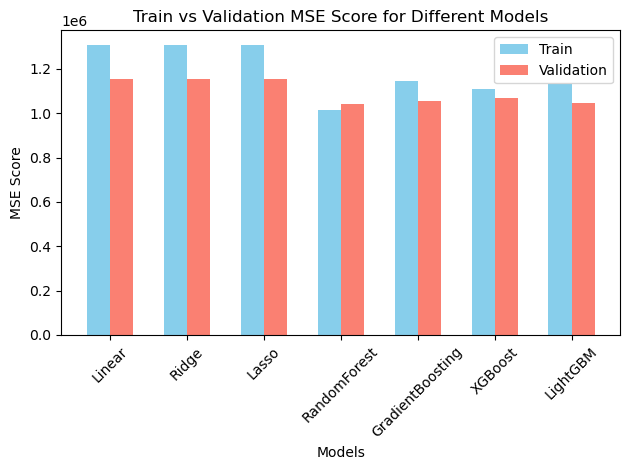

In [85]:
x = np.arange(len(result['Model'].unique()))  # 각 모델의 x 위치
width = 0.3  # 막대의 너비

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
fig, ax = plt.subplots()

# 훈련 데이터와 검증 데이터의 R² 값을 다른 색상으로 막대 그래프에 그리기
ax.bar(x - width/2, result[result['Type'] == 'Train']['MSE'].values, width, label='Train', color='skyblue')
ax.bar(x + width/2, result[result['Type'] == 'Validation']['MSE'].values, width, label='Validation', color='salmon')

# 그래프 제목과 라벨 추가
ax.set_xlabel('Models')
ax.set_ylabel('MSE Score')
ax.set_title('Train vs Validation MSE Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(result['Model'].unique())
ax.legend()

plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

모델별 RMSE 그래프

<Figure size 1000x600 with 0 Axes>

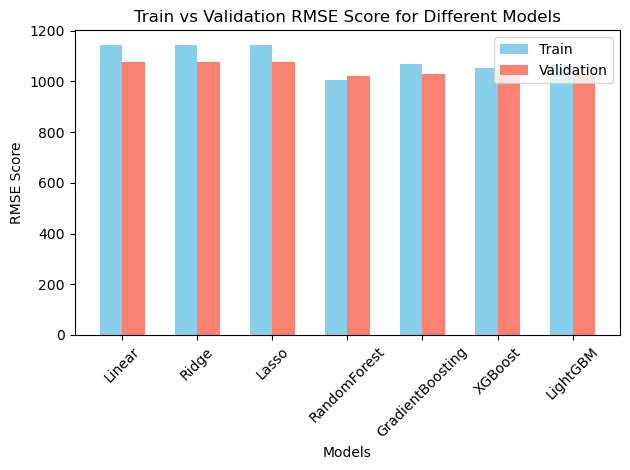

In [86]:
x = np.arange(len(result['Model'].unique()))  # 각 모델의 x 위치
width = 0.3  # 막대의 너비

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
fig, ax = plt.subplots()

# 훈련 데이터와 검증 데이터의 R² 값을 다른 색상으로 막대 그래프에 그리기
ax.bar(x - width/2, result[result['Type'] == 'Train']['RMSE'].values, width, label='Train', color='skyblue')
ax.bar(x + width/2, result[result['Type'] == 'Validation']['RMSE'].values, width, label='Validation', color='salmon')

# 그래프 제목과 라벨 추가
ax.set_xlabel('Models')
ax.set_ylabel('RMSE Score')
ax.set_title('Train vs Validation RMSE Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(result['Model'].unique())
ax.legend()

plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

모델별 MAE 그래프

<Figure size 1000x600 with 0 Axes>

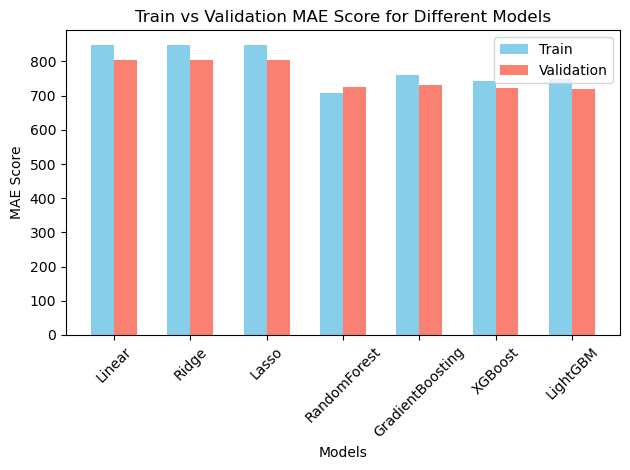

In [87]:
x = np.arange(len(result['Model'].unique()))  # 각 모델의 x 위치
width = 0.3  # 막대의 너비

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
fig, ax = plt.subplots()

# 훈련 데이터와 검증 데이터의 R² 값을 다른 색상으로 막대 그래프에 그리기
ax.bar(x - width/2, result[result['Type'] == 'Train']['MAE'].values, width, label='Train', color='skyblue')
ax.bar(x + width/2, result[result['Type'] == 'Validation']['MAE'].values, width, label='Validation', color='salmon')

# 그래프 제목과 라벨 추가
ax.set_xlabel('Models')
ax.set_ylabel('MAE Score')
ax.set_title('Train vs Validation MAE Score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(result['Model'].unique())
ax.legend()

plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

모델별 R², MSE, RMSE, MAE 그래프 한번에 그리기

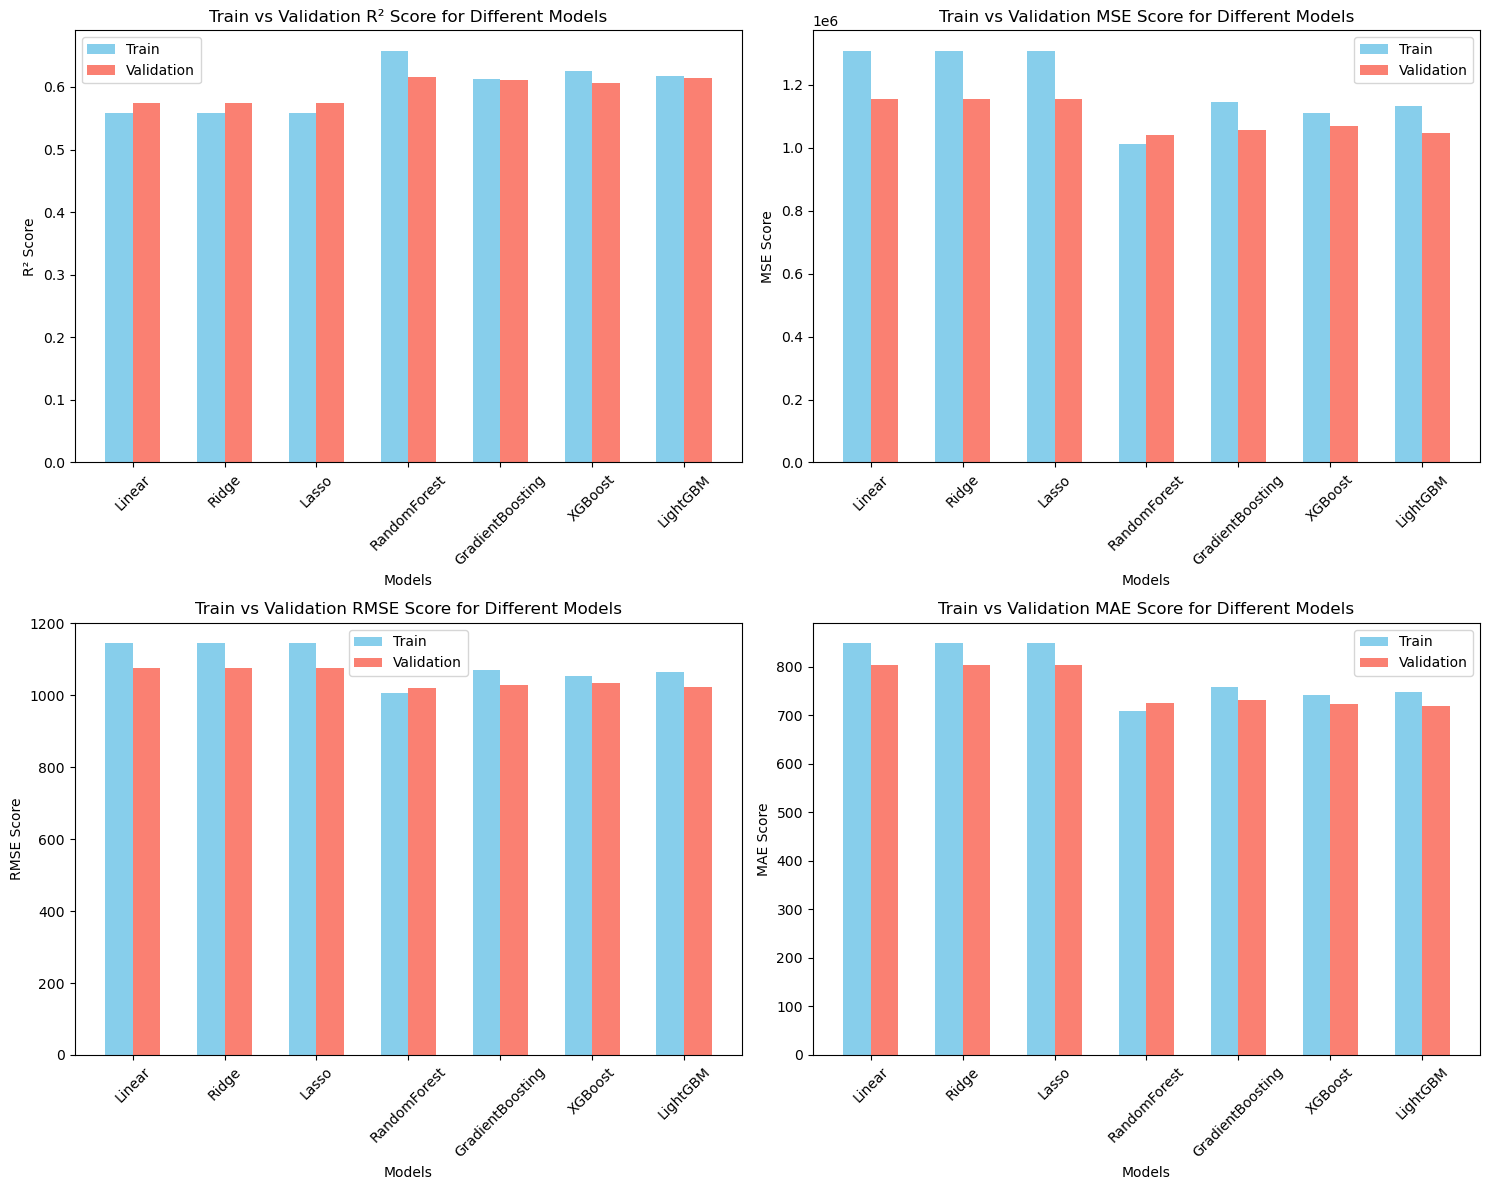

In [90]:
# x 위치 설정 (모델 개수만큼 위치 생성)
x = np.arange(len(result['Model'].unique()))  # 각 모델의 x 위치
width = 0.3  # 막대의 너비

# 그래프 크기 설정
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 훈련 데이터와 검증 데이터의 R², MSE, RMSE, MAE 값을 각각 그리기 위한 반복문
metrics = ['R²', 'MSE', 'RMSE', 'MAE']
colors = ['skyblue', 'salmon']

for i, metric in enumerate(metrics):
    # 훈련 데이터와 검증 데이터의 각 지표 값
    train_values = result[result['Type'] == 'Train'][metric].values
    valid_values = result[result['Type'] == 'Validation'][metric].values

    # 막대 그래프 그리기
    ax = axes[i//2, i%2]  # 2x2 형태로 서브플롯 설정

    ax.bar(x - width/2, train_values, width, label='Train', color=colors[0])
    ax.bar(x + width/2, valid_values, width, label='Validation', color=colors[1])

    # 그래프 제목과 라벨 추가
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metric} Score')
    ax.set_title(f'Train vs Validation {metric} Score for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(result['Model'].unique())
    ax.legend()

    # x축 레이블을 45도로 회전
    ax.tick_params(axis='x', rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()
